## **Inheritance in Python**

---
Inheritance is Python's core manner to reuse code, unlike Java or C++, who both favour composition.
Inheritance is the mechanism where a class, the subclass, inherits traits from another class, the base class. As you will see in this notebook, inheritance allows you to go from the general, to the specialised. Inheritance allows you to use the attributes and methods of base (or super class) and add to that functionality to your subclass with attributes and methods of your own and thus specializing off a general parent.

Let's do a simple example of inheritance to make this clear.


In [ ]:
class Shape:# our base class
    
    def area(self):
        pass
    
    def perimeter(self):
        pass
    
    def colour(self)->str:
        return f'{type(self).__name__} is a lovely colour purple'
    
s = Shape() 
s.colour()

In [ ]:
from dataclasses import dataclass

@dataclass
class Rectangle(Shape):
    length:float=0
    breadth:float=0
    
    def colour(self)->str:
        return super().colour()
    
    def area(self)->float: 
        return self.length*self.breadth
    
    def perimeter(self)->float:
        return 2*(self.length+self.breadth)
        
r = Rectangle(length=4.0, breadth=5.0)    
r

In [ ]:
r.area()

In [ ]:
r.perimeter()

In [ ]:
r.colour()

In [ ]:
@dataclass
class Square(Rectangle):
    
    def colour(self)->str:
        return super().colour()
    
    def area(self)->float: 
        return super().area()
    
    def perimeter(self)->float:
        return super().perimeter()
    
sq = Square(length=4.0, breadth=4.0)
sq    

In [ ]:
sq.area()

In [ ]:
sq.perimeter()

In [ ]:
sq.colour()

As we can see we have a base class Shape, with one implemented method and two empty methods.

From shape we create rectangle, we override the inherit methods, `colour()` we simply implement with a `super()` call. 

From rectangle we derive the square, which has all the same methods and only `super()` calls. This works as we inherit the fields from `Rectangle`    

To see all of this and more we can call on help which tells us what we inherit.


In [ ]:
help(sq)

#### **help**

I cannot stress this enough, help is a great source of information, you should take your time and read that information thoroughly. Help does not just give you information on the object you are calling help on. It also gives you a great insight into how Python works internally, more on that in Objects in Python notebook.   

Help for instance gives you information about the methods that are defined for this class. Information on where these methods are defined and how to resolve which methods to use, and in which order. This is known as the MRO which stands for Method Resolution Order. I cannot stress enough how important it is to understand the MRO in Python, if only because Python favours inheritance over composition. 

The inheritance relation in Python is deep. We can even use the base class's `__init__()` method with a super() call.

In [ ]:
from dataclasses import dataclass

class Shape:# our base class
    
    def area(self):
        pass
    
    def perimeter(self):
        pass
    
    def colour(self)->str:
        return f'{type(self).__name__}.colour() returns a lovely colour purple'

@dataclass    
class Rectangle(Shape):
    length:float=0.0
    breadth:float=0.0
    
    def colour(self)->str:
        return super().colour()
    
    def area(self)->float: 
        return self.length*self.breadth
    
    def perimeter(self)->float:
        return 2*(self.length+self.breadth)

@dataclass    
class Square(Rectangle):
    
    def __init__(self, side:float=0):
        self.side = side
        super().__init__(side, side)

    def colour(self)->str:
        return super().colour()
    
    def area(self)->float: 
        return super().area()
    
    def perimeter(self)->float:
        return super().perimeter()

In [ ]:
s = Shape()
s.colour()

In [ ]:
r = Rectangle(length=4.0, breadth=5.0)
r.area()

In [ ]:
sq2 = Square(side=4.0)
sq2.area()

In [ ]:
sq2.colour()

In [ ]:
sq2.__dict__

#### **Multiple Inheritance**
Unlike Java, Python knows multiple inheritance. Meaning that you can have multiple parents to inherit from. However, this brings issues, but before we consider those issues, let's look at an example of multiple inheritance first.
    
Say that you have class A with desirable features, and you want them for your class C, but with slightly different behaviour, you could write a third class B that would adopt that behaviour of C to fit your purposes. This quite a common way of programming in Python it is called a **mixin class**. A mixin class is a class that is designed to be subclassed together with a least one other class. It only customizes the behaviour of a child class without providing the full functionality of a concrete object.

The use case of a Mixin class is twofold:
 1. You want to provide a lot of optional features for a class.
 2. Or you want to use one particular feature in a lot of different classes.

Say we thought about it and really colour is not a good trait for a shape to have we could rewrite everything with a Mixin class. Where the outside trait of colour comes from the MixinColour class.


In [ ]:
import math
from dataclasses import dataclass

class Shape:# our base class
    
    def area(self):
        pass
    
    def perimeter(self):
        pass

class MixinColour:
    '''Mixin class provides colours to shape classes'''
    
    def colour(self)->str:
        match type(self).__name__:
            case 'Rectangle':
                return f'{type(self).__name__}.colour() returns a lovely colour purple'
            case 'Rhombus':
                return f'{type(self).__name__}.colour() returns a lovely colour orchid'
            case 'Square':
                return f'{type(self).__name__}.colour() returns a lovely colour violet'
            case _:
                return f'{type(self).__name__}.colour() returns a lovely colour lilac'
            
    
@dataclass
class Rectangle(Shape, MixinColour):
    length:float=0.0
    breadth:float=0.0
         
    def area(self)->float: 
        return self.length*self.breadth
    
    def perimeter(self)->float:
        return 2*(self.length+self.breadth)
    
    def colour(self):
        return super().colour()

@dataclass    
class Rhombus(Shape, MixinColour):
    side:float=0.0
    degrees:int=0
           
    def area(self)->float:
        return self.side**2*math.sin(math.radians(self.degrees))
    
    def perimeter(self)->float:
        return 4*self.side
    
    def colour(self):
        return super().colour()
    
@dataclass
class Square(Shape, MixinColour):
    side:float=0.0
    
    def area(self)->float: 
        return 4*self.side
    
    def perimeter(self)->float:
        return 4*self.side
    
    def colour(self):
        return super().colour()

In [ ]:
rec = Rectangle(length=4.0, breadth=5.0)
rho = Rhombus(side=4.0, degrees=45)
sqr = Square(side=4.0)

In [ ]:
sqr.area()

In [ ]:
rec.area()

In [ ]:
rho.area()

In [ ]:
rho.colour()

In [ ]:
rec.colour()

In [ ]:
sqr.colour()

As you can see this works fine. However suddenly we realize that sqr is a special version of Rhombus and Rectangle.   

If we make a child of both, we have a problem. Honestly, we would want the perimeter() method of Rhombus as a square does not have length and breadth just a side. While we do not want area() of Rhombus as we need an angle. Which we could provide, but really need not use in a determining the parameter of a square. 

Which one do you choose? To understand that we need to deepen our understanding of inheritance.


#### **DAG**
How does inheritance work, how do we know what method will be choosen? To answer that question I have to introduce the mathematical concept of a DAG a directed acyclic graph

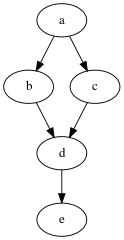

A DAG is simply a set of nodes (a.k.a vertices) and arcs (a.k.a edges).     

The arcs connect the nodes in a directed manner (one way) and never create a cycle, meaning if you have gone from a to b there is no way back to a.  

Python's inheritance structure is a DAG. If e executes a method it hasn't implemented the interpreter simply looks up to the nodes at one level higher and executes that method. If it can't find an implemented method at level d it moves up to b,c and finally a. If none of these have implemented that method it throws an error.   

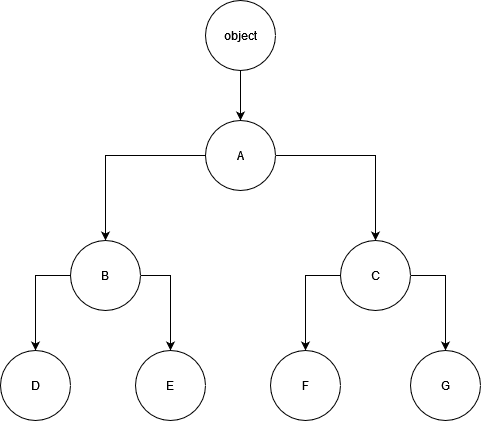     
In Java, C#, and Rust there is no multiple inheritance and there the DAG is basically a tree structure, where every class has only one parent, which never leads to confusion, to go from G to A, there is only one path. To go from e to a on the previous graph there are two paths, which implies a choice, which path to follow. This is a particular problem for languages that support multiple inheritance like C++ and Python. It is affectionally known as the Deadly Diamond of Death. This diamond problem needs a solution, the Python solution, I feel, is particularly elegant, however there are concepts you should know.
 1. What is Pythons method resolution order (MRO)?
 2. How can I find the MRO
 3. What algorithm does Python use to determine the MRO
 4. What is super()
 5. How do I use super() to exploit multiple inheritance?

In [ ]:
class A:
    pass

class B(A):
    pass

class C(A):
    pass

class D(B,C):
    pass

class E(C):
    pass

class F(D,E):
    pass

class G(F):
    '''our starting point for the MRO'''
    pass

The above class as a DAG    
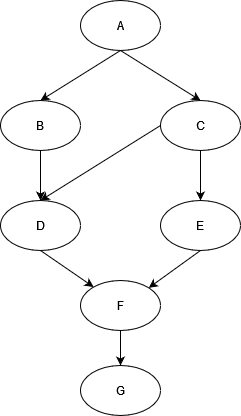

The MRO is the order of inheritance Python follows. It is used to determine the route through the graph. It can be called two ways    

The first way is by simply calling help on the class

In [ ]:
help(G)

The second manner is by calling the `__mro__` atribute of the class, this is inferior as it is less clear, but it is also less verbose

In [ ]:
G.__mro__

#### **$C^3$ linearization**

Python uses the $C^3$ linearization algorithm to create, from the slightly complicated DAG from above, a simple ordered line. See https://en.wikipedia.org/wiki/C3_linearization  for details on how.

Let's look at the Method Resolution Order as determined by $C^3$.
 * G: The MRO always starts with the class itself; the MRO always starts looking for the method in the class itself, only if it cannot find an implementation there, it moves up the DAG. This is very clever and allows you to create smart solutions to everyday programming problems.
 * F: The MRO goes to the parent directly above F. 
 * D: We have two parent the MRO chooses which parent to follow in an order from left to right
 * B: Once the MRO has not found the method in D it doesn't revert back to the other parent, instead it traverses the graph further up to the left most parent of D. 
 * E: When it meets start node A it traverses all the way down the graph to where it first encountered another parent to F.
 * C: The parent of E
 * A: The start node in graph terminology the root. 
 * builtins.object - This is a special node. Every object in Python is a subclass of the built-in object. Python inheritance DAG will ultimately start with builtins.object    

 
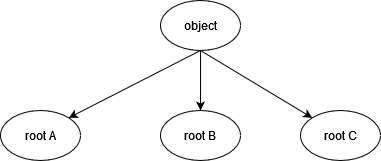    

All DAGs in Python thus ultimately have the same start node, for all classes are subclass of root

In [ ]:
# this an example from Raymond Hettinger with some adaptations by me to bring it up to todays standards
from typing import Union

class DoughFactory:
    
    def get_dough(self)->str:
        return 'insecticide treated wheat dough'
    
class Pizza(DoughFactory): # 1
    
    def order_pizza(self, *toppings:Union[str,list[str]])->None:
        print('getting dough')
        dough = DoughFactory().get_dough() # 2
        print(f'making pie with {dough}')
        for topping in toppings:
            print(f'Adding {topping}')      
    

First proof that everything is a subclass of object even I don't declare the inheritance relationship as in the code above.

In [ ]:
issubclass(DoughFactory, object)

In [ ]:
Pizza().order_pizza('pulpo', 'onion')

There are a few problems with this code. 

 1. We do not want to eat any insecticide treated pizza, but we will solve this problem last. 
 2. The actual first problem Hettinger does not even mention in his talk, but this code actually does not use inheritance. We declare the inheritance relationship in 1 but in 2 we use object composition to access get_dough() `DoughFactory().get_dough()` I will call it the second problem.  
 3. This code repeats itself; therefor it is not DRY, which after all stands for, do not repeat yourself. If I change the name DoughFactory into DeegFabriek I will have to change the Pizza class in two places.   
 
We should fix these problems, but before I do let me prove that this code does not use inheritance by running this code without specifying the inheritance relationship.


In [ ]:
# this an example from Raymond Hettinger withn some adaptations by me to bring it up to todays standards
from typing import Union

class DoughFactory:
    
    def get_dough(self)->str:
        return 'insecticide treated wheat dough'
    
class Pizza: # 1
       
    def order_pizza(self, *toppings:Union[str,list[str]])->None:
        print('getting dough')
        dough = DoughFactory().get_dough() # 2
        print(f'making pie with {dough}')
        for topping in toppings:
            print(f'Adding {topping}')     

In [ ]:
Pizza().order_pizza('pulpo', 'onion')

Now to fix the problems.

In [ ]:
# this an example from Raymond Hettinger with some adaptations by me to bring it up to todays standards
from typing import Union

class DoughFactory(object):
    
    def get_dough(self)->str:
        return 'insecticide treated wheat dough'
    
class Pizza(DoughFactory): 
    
    def order_pizza(self, *toppings:Union[str,list[str]])->None:
        print('getting dough')
        dough = super().get_dough() 
        print(f'making pie with {dough}')
        for topping in toppings:
            print(f'Adding {topping}')    

In [ ]:
Pizza().order_pizza('salami', 'romano pepper')

#### **super()**   
This code has solved both problems it is DRY as a bone and uses inheritance. `dough` uses the `super()` function to call DoughFactory's `get_dough()` method. If the name of DoughFactory changes to DeegFabriek, super() knows where to find with the caveat you adopt Pizza to class Pizza(DeegFabriek):

I learned Java as OO language and though I knew what super() meant, but in Python the meaning is slightly different and best described as *next-in-line*.

For a programmer in Python, it is important to remember `super()`is your friend. However, it is also a friend to your fellow programmer, using super() makes easier to understand what is going on, for you really do not need to use `super()`


In [ ]:
Pizza().get_dough()

But how does super help us with not having insecticide treated wheat dough?   

This is where Python's multiple inheritance and MRO really becomes powerful yet stays remarkably simple.

In [ ]:
class OrganicDoughFactory(DoughFactory):
    
    def get_dough(self)->str:
        return 'Pure untreated wheat dough'
    
class OrganicPizza(Pizza, OrganicDoughFactory):
    '''this class is left empty on purpose'''
    pass

In [ ]:
OrganicPizza().order_pizza('salami', 'romano pepper')

The first time I saw this I just smiled, it was the most simple and elegant solution to a wicked problem in OO: 
How to bypass an unwanted superclass of a class we want in a DAG?  

But what exactly happens?
    
First, we need to go back to MRO. The MRO always starts with the children. Then the most left parent is chosen, it goes up the MRO line until the root (or object) is met, if that is case, we go the next most left parent to start a path we have not traversed. 

To solve the problem, we simply create a new descendant that is now top of the MRO OrganicPizza. By adding OrganicPizza to the MRO, we have access to order_pizza, by adding OrganicDoughFactory as second parent, we ensure that our call to `super()` is handled by OrganicDoughFactory, which is a subclass of DoughFactory. The latter staying the root.
   
Let's look at the MRO of OrganicPizza.


In [ ]:
help(OrganicPizza)

As you can see from help you inherit `order_pizza(args)` from Pizza while you inherit `get_dough()` from  OrganicPizza
This is a simple example of how powerful and elegant, yet simple Python's multiple inheritance structure is.  

We can build on this example we can for instance bypass an unwanted class in the MRO by putting a class in front of it as we did here with OrganicDoughFactory. If this confuses you, draw it and you will see.    

But how to use this in your daily programming practice. Again, we turn to Hettinger who gives us an excellent example of using it for testing with a mock.


In [ ]:
# this an example from Raymond Hettinger withn some adaptations by me to bring it up to todays standards
from dataclasses import dataclass, field

@dataclass
class Robot:
    '''Sophisticated robot class'''
    #don't wear down real robots just for testing
    def fetch(self,tool:str)->None:
        print(f'Physical movent, fetching {tool}')
        
    def move_forwards(self, tool:str)->None:
        print(f'Physical movent, moving {tool} forward!')
        
    def move_backwards(self, tool:str)->None:
        print(f'Physical movent, moving {tool} backward!')
        
    def replace(self,tool:str)->None:
        print(f'Physical movent, replacing {tool}!')   
        

From this base I could create several specialised robots. 

I could create a GardeningRobot or a PostmanRobot or a CleaningRobot as below. 

This is the power of inheritance I can specialize off a general concept.

In [ ]:
@dataclass
class CleaningRobot(Robot):
    '''Custom robot that can clean with a given tool'''
    
    def clean(self, tool:str, times=10)->None:
        super().fetch(tool)
        for n in range(times):
            super().move_forwards(tool)
            super().move_backwards(tool)
        super().replace(tool)
    

In [ ]:
CleaningRobot().clean('mop')

Robot's are expensive as Hettinger rightfully says.    

Thus we want to test the CleaningRobot without actually using robot. To prevent wear and tear on our robot, we mock the robot for use in tests.

In [ ]:
@dataclass
class MockRobot(Robot):
    '''This is a mock robot class instead of actually doing any movement we store the commands in a list'''
    tasks:list[str]= field(default_factory=list)
    
    def fetch(self,tool:str)->None:
        self.tasks.append(f'Fetching {tool}')
        
    def move_forwards(self, tool:str)->None:
        self.tasks.append(f'Moving {tool} forwards')
        
    def move_backwards(self, tool:str)->None:
        self.tasks.append(f'Moving {tool} backwards')
        
    def replace(self,tool:str)->None:
         self.tasks.append(f'Replacing {tool}')     

Now we want to inject this mock bot into the robot dependency. We have just seen how easy this achieved in Python.   

We simply add a new descendent to the MRO line

In [ ]:
@dataclass
class MockedCleaningRobot(CleaningRobot, MockRobot):
    '''just a class for dependecy injection'''
    pass

In [ ]:
@dataclass
class TestCleaningRobot:
    '''I am just mocking a test :-)''' 
    expected:tuple[list]=field(default_factory=tuple)
    t:object=None
    
    
    def __post_init__(self):    
        self.t = MockedCleaningRobot()
        self.t.clean('rag')
        self.expected = (['Fetching rag'] +
                ['Moving rag forwards', 'Moving rag backwards']*10 +
                ['Replacing rag'])
        
    def test(self)->bool:        
        return self.t.tasks == self.expected  

In [ ]:
TestCleaningRobot().test()

#### **Python subclasses are not subtypes!**
This might strike you as odd, after all a class is of a type, therefore a subclass of a type should be a subtype, but this would only be so if the typing was static, and Python is a dynamic language. You cannot perform Liskov in Python, as you cannot guarantee type. If you cannot do Liskov, you cannot do SOLID (would you want to?), well you can mock it, see the SOLID notebook. 

You could use static DuckTyping or ABCs to create a subtype but would need to use an external type-checker like MyPy to actual check type. But MyPy checks this before interpretation by the interpreter. The Python interpreter (usually CPython) determines type, not MyPy. Python will never be a static language, dixit Guido van Rossum. 

Python’s multiple inheritance causes some specific problems caused by dynamic typing see the code.
  

In [ ]:
class A:
    
    def f(self, some_number):
        return some_number % 2
    
class B:
    
    def f(self, some_string):
        return f'the string was: {self.some_string}'
    
class C(A,B):
    
    def f(self, something):
        return super().f(something)
    
c = C()
c.f('George is a rhino')

Python does not catch that we can call the modulo operator on a string until interpretation. Python does check for type when interpreting and throws the TypeError with the following message 'not all arguments converted during string formatting'.   

Unfortunately, despite super() being super I have not found a solution to this problem. That is to choose the correct order of the MRO based on type the descendant is using. I do not think it will ever come to Python either, for the only solution I see is by using type inference (Haskell style) with static typing, but hey I might be wrong.

If we flip the resolution order, we have no problems not even if we throw in some number.

In [ ]:
class A:
    
    def f(self, some_number):
        return some_number % 2
    
class B:
    
    def f(self, some_string):
        return f'the string was: {some_string}'
    
class C(B,A):
    
    
    def f(self, something):
        return super().f(something)
    
c = C()
c.f('George is a rhino')

In [ ]:
c.f(42)

#### **Subclassing Python built-in classes**
Maybe you wonder if you can subclass a Python built-in class, the answer is yes and don't do it. The CPython interpreter will most likely just ignore your implementation of a method and choose the one from the build in class so what is the point?   

You implement a Python interface and use Python built-in classes instead. However, having said all that; in Hettinger's video there is a great example how to subclass Python built-ins if you need them to show different than standard behaviour.

#### **Composition**
Inheritance is not the only way to achieve code reuse. You could object composition to create code reuse and polymorphic behaviour. Remember object-oriented programming derives its popularity for its prowess to model the real world. Object composition is then also a real-world phenomenon. 

Consider a car, it is composed object it  is made of:
 - Engine
 - Chassis
 - Interior
 - Body
 - and more ...    
 
All those objects that make up a car are in themselves objects. Take an engine, it is composed of numerous objects. Now consider programming a car would you want it to be an inheritance relationship?


In [ ]:
class Engine:
    pass

class Chassis:
    pass

class Interior:
    pass

class Body:
    pass

class Car(Engine, Chassis, Interior, Body):
    pass

Hopefully this intuitively feels the wrong approach    

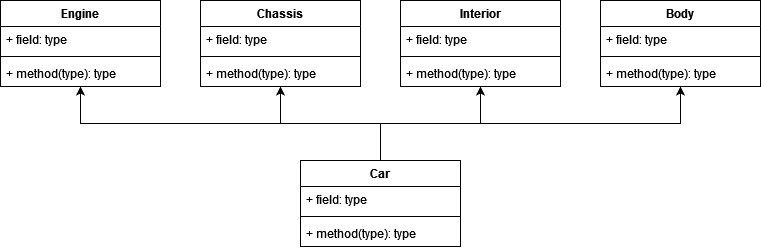    

An engine for instance, is a complicated object. It consists of many many objects that in themselves consists of many objects. Trying to caputure that in an inheritance realtionship would be insanely complicated, the DAG would be a nightmare. Better to do object composition.

In [ ]:
from dataclasses import dataclass

@dataclass
class Car:
    engine:   Engine   = None
    chassis:  Chassis  = None
    interior: Interior = None 
    body:     Body     = None
    
car = Car()    
    
    

In [ ]:
car


#### **Composition over inheritance**
The gang of four once stated famously that you should prefer object composition over inheritance. This is not that easy to say in Python as it is in C++ or Java. As we have seen here Python's multiple inheritance is particularly elegant and powerful. It can be used often where the Gang of Four would advise against it. 

Object composition leaves you with a harder form of dependency than inheritance as you can simply override the parents’ implementations of methods you do not like. In general dependencies should be avoided as much as possible.   

The GoF is quite outdated if you ask me, you should realize that of the twenty-three coding patterns of the gang of four probably quite a few are not in use anymore. I will refer you to the notebook on those patterns I feel are still relevant. (Do realize that I prefer functional programming where the twenty-three patterns are basically of little use)

#### **When to use compsition when inheritance**
Python favors inheritance which it's Mixin classes, clever MRO. Inheritance should be all about common traits and operations, you want to go from general to specialised. 

If you have no common traits and operations do not use inheritance!

However if you use object composition you need to take care of staying loosly coupled. For more information about loose coupling I refer you to the SOLID notebook

The video of Raymond Hettinger at PyCon 2015 in Canada https://www.youtube.com/watch?v=EiOglTERPEo

#### **The End**